In [ ]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, issparse
from google.colab import drive
from pandas import (
    DataFrame, HDFStore
)
import datetime
from scipy import stats
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from math import radians, cos, sin, asin, sqrt
from sklearn.cluster import KMeans
import networkx as nx
import folium
import bokeh
from bokeh.io import show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Converting HDF5 to CSV for EDA
extract_id = lambda x: int(x[:])
sensor_id_df[0] = sensor_id_df[0].apply(extract_id)
sensor_ids = sensor_id_df[0].tolist()
sensor_id_df
# dataset2 = f["path/to/dataset2"]

,0
0,773869
1,767541
2,767542
3,717447
4,717446
...,...
202,717592
203,717595
204,772168
205,718141


In [ ]:
duplicate_sensor_ids = sensor_id_df.duplicated(subset=[0], keep=False)
duplicate_sensor_ids

0      False
1      False
2      False
3      False
4      False
       ...  
202    False
203    False
204    False
205    False
206    False
Length: 207, dtype: bool

In [ ]:
time_sequences_df.columns = ['timestamp']
# define a lambda function to convert Unix timestamps to readable date time values
to_datetime = lambda x: datetime.datetime.utcfromtimestamp(x/1e9).strftime('%Y-%m-%d %H:%M:%S')
# apply the lambda function to the 'timestamp' column and create a new column with the converted values
time_sequences_df['datetime'] = time_sequences_df['timestamp'].apply(to_datetime)
time_sequences_df['datetime'] = pd.to_datetime(time_sequences_df['datetime'])
datetime_vec = time_sequences_df['datetime'].values
time_sequences_df

,timestamp,datetime
0,1330560000000000000,2012-03-01 00:00:00
1,1330560300000000000,2012-03-01 00:05:00
2,1330560600000000000,2012-03-01 00:10:00
3,1330560900000000000,2012-03-01 00:15:00
4,1330561200000000000,2012-03-01 00:20:00
...,...,...
34267,1340840100000000000,2012-06-27 23:35:00
34268,1340840400000000000,2012-06-27 23:40:00
34269,1340840700000000000,2012-06-27 23:45:00
34270,1340841000000000000,2012-06-27 23:50:00


In [ ]:
duplicate_time_sequences = time_sequences_df.duplicated(subset=['datetime'], keep=False)
duplicate_time_sequences

0        False
1        False
2        False
3        False
4        False
         ...  
34267    False
34268    False
34269    False
34270    False
34271    False
Length: 34272, dtype: bool

In [ ]:
adj_mat_df

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
1,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34267,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
34268,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
34269,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
34270,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


In [ ]:
# Checking whether the data is sparse or not
issparse(adj_mat_df)

False

In [ ]:
adj_mat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
1,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,63.333333,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


In [ ]:
adj_mat_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
34267,65.000000,65.888889,68.555556,61.666667,0.0,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
34268,61.375000,65.625000,66.500000,62.750000,0.0,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
34269,67.000000,59.666667,69.555556,61.000000,0.0,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
34270,66.750000,62.250000,66.000000,59.625000,0.0,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000
34271,65.111111,66.888889,66.777778,61.222222,0.0,49.555556,65.777778,65.111111,63.000000,61.666667,...,56.000000,67.444444,64.888889,60.888889,64.222222,66.444444,68.444444,63.555556,68.666667,61.777778


In [ ]:
adj_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34272 entries, 0 to 34271
Columns: 207 entries, 0 to 206
dtypes: float64(207)
memory usage: 54.1 MB


In [ ]:
adj_mat_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
count,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,...,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000,34272.000000
mean,54.631359,60.452789,60.726120,49.524287,46.079798,50.952003,54.471684,57.255095,56.068044,52.871841,...,37.803342,58.156679,51.217523,59.795754,59.329923,56.915083,62.484679,54.697381,58.920210,51.197504
std,22.619199,15.970239,18.313353,15.843261,19.350345,16.681760,17.984761,18.751065,18.240361,23.343805,...,13.525743,20.690411,22.224997,16.126225,19.849950,18.260438,16.959238,16.303651,19.080474,21.239354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.364583,63.000000,65.444444,50.333333,34.666667,49.555556,55.750000,61.000000,58.222222,43.428571,...,30.444444,64.111111,53.444444,61.714286,63.666667,60.222222,65.888889,50.125000,62.888889,54.125000
50%,64.888889,65.000000,67.375000,53.875000,46.000000,56.111111,62.111111,63.333333,62.444444,65.875000,...,43.222222,67.111111,61.777778,64.875000,66.777778,63.000000,67.625000,61.125000,66.125000,62.000000
75%,66.875000,66.375000,68.444444,58.125000,64.500000,60.333333,65.000000,65.000000,64.888889,67.625000,...,46.625000,68.444444,64.375000,66.500000,68.250000,64.750000,68.625000,64.444444,67.750000,63.444444
max,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,65.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000


In [ ]:
adj_mat_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,1.000000,0.637769,0.510206,0.605174,0.456675,0.573479,0.618630,0.516074,0.462342,0.290810,...,0.570211,0.670919,0.518453,0.586368,0.454290,0.481700,0.596625,0.566312,0.585063,0.489176
1,0.637769,1.000000,0.846971,0.813119,0.613031,0.790383,0.792035,0.787707,0.786949,0.575781,...,0.733161,0.755573,0.617961,0.944967,0.759842,0.792740,0.940425,0.860888,0.800500,0.621870
2,0.510206,0.846971,1.000000,0.722337,0.590502,0.701321,0.633733,0.671920,0.838274,0.741718,...,0.647872,0.598816,0.519551,0.813801,0.733021,0.681450,0.819405,0.870590,0.675446,0.579383
3,0.605174,0.813119,0.722337,1.000000,0.736534,0.889258,0.803997,0.691029,0.643462,0.531714,...,0.747188,0.790862,0.626163,0.736425,0.610629,0.644362,0.767964,0.809008,0.727463,0.670433
4,0.456675,0.613031,0.590502,0.736534,1.000000,0.618630,0.733927,0.571207,0.495107,0.513899,...,0.660759,0.626571,0.490299,0.510650,0.457111,0.482775,0.573140,0.731314,0.579529,0.663299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.481700,0.792740,0.681450,0.644362,0.482775,0.643865,0.626951,0.625047,0.649430,0.463509,...,0.591056,0.581006,0.465614,0.783069,0.933858,1.000000,0.809410,0.697089,0.641794,0.494677
203,0.596625,0.940425,0.819405,0.767964,0.573140,0.757590,0.746271,0.754722,0.774041,0.560694,...,0.696451,0.694942,0.572322,0.928169,0.775660,0.809410,1.000000,0.829552,0.762585,0.593245
204,0.566312,0.860888,0.870590,0.809008,0.731314,0.746786,0.760491,0.715993,0.798362,0.754304,...,0.750133,0.705241,0.597116,0.802856,0.708829,0.697089,0.829552,1.000000,0.730888,0.666751
205,0.585063,0.800500,0.675446,0.727463,0.579529,0.682788,0.750942,0.660655,0.616542,0.438951,...,0.704588,0.731330,0.648932,0.761813,0.605836,0.641794,0.762585,0.730888,1.000000,0.594881


In [ ]:
adj_mat_df.index = datetime_vec
adj_mat_df.columns = sensor_ids
adj_mat_df

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,65.000000,65.888889,68.555556,61.666667,0.000000,54.555556,62.444444,63.333333,59.222222,65.333333,...,52.888889,69.000000,65.111111,55.666667,66.333333,62.444444,66.777778,64.888889,69.666667,62.333333
2012-06-27 23:40:00,61.375000,65.625000,66.500000,62.750000,0.000000,50.500000,62.000000,67.000000,65.250000,67.125000,...,54.000000,69.250000,60.125000,60.500000,67.250000,59.375000,66.000000,61.250000,69.000000,62.000000
2012-06-27 23:45:00,67.000000,59.666667,69.555556,61.000000,0.000000,44.777778,64.222222,63.777778,59.777778,57.666667,...,51.333333,67.888889,64.333333,57.000000,66.000000,62.666667,68.666667,63.333333,67.444444,61.222222
2012-06-27 23:50:00,66.750000,62.250000,66.000000,59.625000,0.000000,53.000000,64.285714,64.125000,60.875000,66.250000,...,51.125000,69.375000,61.625000,60.500000,65.625000,66.375000,69.500000,63.000000,67.875000,63.500000


In [ ]:
adj_mat_df.isna().sum()

773869    0
767541    0
767542    0
717447    0
717446    0
         ..
717592    0
717595    0
772168    0
718141    0
769373    0
Length: 207, dtype: int64

In [ ]:
# number of times sensors read zero speeds
sensors_off = (adj_mat_df == 0).all(axis=1)
num_times_sensors_off = sensors_off.sum()
num_times_sensors_off

2148

In [ ]:
# Timeseuquences when all sensors read zeros
time_sequences_off = datetime_vec[sensors_off]
time_sequences_off

array(['2012-03-01T00:15:00.000000000', '2012-03-01T00:20:00.000000000',
       '2012-03-03T00:15:00.000000000', ...,
       '2012-06-25T00:55:00.000000000', '2012-06-27T15:35:00.000000000',
       '2012-06-27T15:40:00.000000000'], dtype='datetime64[ns]')

**For the above time sequences, Sensors were either turned off for maintenance or sensors might have captured the data but data recording was failed**

**Below is the Data Pre-Processing, Identifying if there are any negative speed values which are Outliers and should be eliminated**

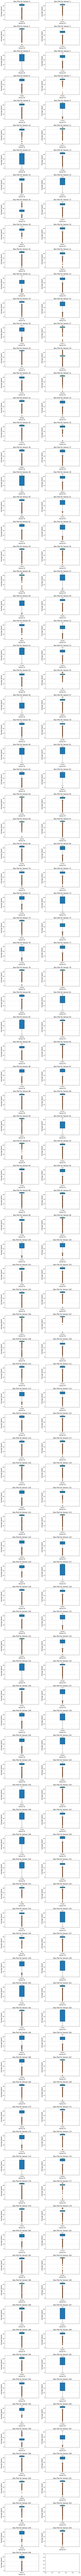

In [ ]:
# create box plots for each sensor column
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# set the number of sensors and number of subplots per row
n_sensors = len(adj_mat_df.columns)
n_cols = 2
# calculate the number of rows required
n_rows = (n_sensors + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4*n_rows))
# calculate the number of rows required
n_rows = (n_sensors + n_cols - 1) // n_cols
for i, sensor in enumerate(adj_mat_df.columns):
  # calculate the subplot row and column index
  row_idx = i // n_cols
  col_idx = i % n_cols
  ax = axes[row_idx, col_idx]
  ax.boxplot(adj_mat_df[sensor],  patch_artist=True, boxprops= dict(facecolor=colors[0], color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(marker='o', markersize=5, markerfacecolor=colors[1], markeredgecolor='black'), medianprops=dict(color=colors[2]), labels=[sensor], showfliers=True)
  ax.set_title('Box Plot for Sensor {}'.format(i), fontsize=14)
  ax.set_xlabel('Sensor ID'.format(sensor), fontsize=12)
  ax.set_ylabel('Average Speed', fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=10)
  ax.grid(axis='y', linestyle='--', alpha=0.7)
# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)
# show the plot
plt.show()

**Identifying anomalies like Accidents, Construction work which can tremendously impact Traffic Flow using Z-Score method and Scatter plot for treatment (Data Pre-Processing)**

In [ ]:
# calculate the Z-score for each data point in the dataframe
z_scores = stats.zscore(adj_mat_df)
# convert the z_scores numpy array to a pandas dataframe
z_scores_df = pd.DataFrame(z_scores, index=adj_mat_df.index, columns=adj_mat_df.columns)
# identify the outliers (data points with a Z-score greater than 3)
outliers = z_scores_df[(z_scores_df < -3)]
outlier_rows = outliers.any(axis=1)
anomalies = adj_mat_df[outlier_rows]
anomalies = anomalies[(anomalies > 0) & (anomalies <= 20)]
anomalies

,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
2012-03-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01 01:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01 01:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 18:50:00,14.555556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-27 18:55:00,17.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-27 19:00:00,14.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-27 19:05:00,15.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Rows 34210,34211 ... 34214 above show that there was some accident which led to delayed traffic speed**

**Data Transformation - Making the Dataset Coarser (5 Minutes to 15 Days-1 Quarter) to identify relationships between time sequences and speeds**

In [ ]:
# Aggregating the 5-minute intervals of time sequences to quarterly time sequences
quarterly_time_df = time_sequences_df.resample('15D', on='datetime').mean()
quarterly_time_df
date_list = quarterly_time_df.index.strftime('%Y-%m-%d').tolist()
date_list

['2012-03-01',
 '2012-03-16',
 '2012-03-31',
 '2012-04-15',
 '2012-04-30',
 '2012-05-15',
 '2012-05-30',
 '2012-06-14']

In [ ]:
# Aggregating the 5-minute intervals of speed to quarterly speeds
def calculate_quarterly_speeds(speed, quarter_days, sequences_in_one_day):
    quarterly_speeds = np.zeros(8)
    for i in range(0, speed.shape[0], 4320):
        start_index = i
        end_index = i + 4320
        quarter_index = int(start_index / 4320)
        quarter_speed = speed[start_index:end_index].mean()
        quarterly_speeds[quarter_index] = quarter_speed
    return quarterly_speeds

In [ ]:
quarterly_speed = list(calculate_quarterly_speeds(adj_mat_df.iloc[:,0],15,288))
quarterly_speed

[58.988809431951786,
 53.14243900646679,
 52.82751258450911,
 58.571167511757785,
 59.82578630217519,
 46.0855019106408,
 54.128080632716056,
 53.39944403108466]

**Identifying Busy Areas in the City - 3.7** 

"\nplt.annotate('Construction Work', xy=(date[10], speed[10]), xytext=(date[5], 15),\n             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)\nplt.show()\n"

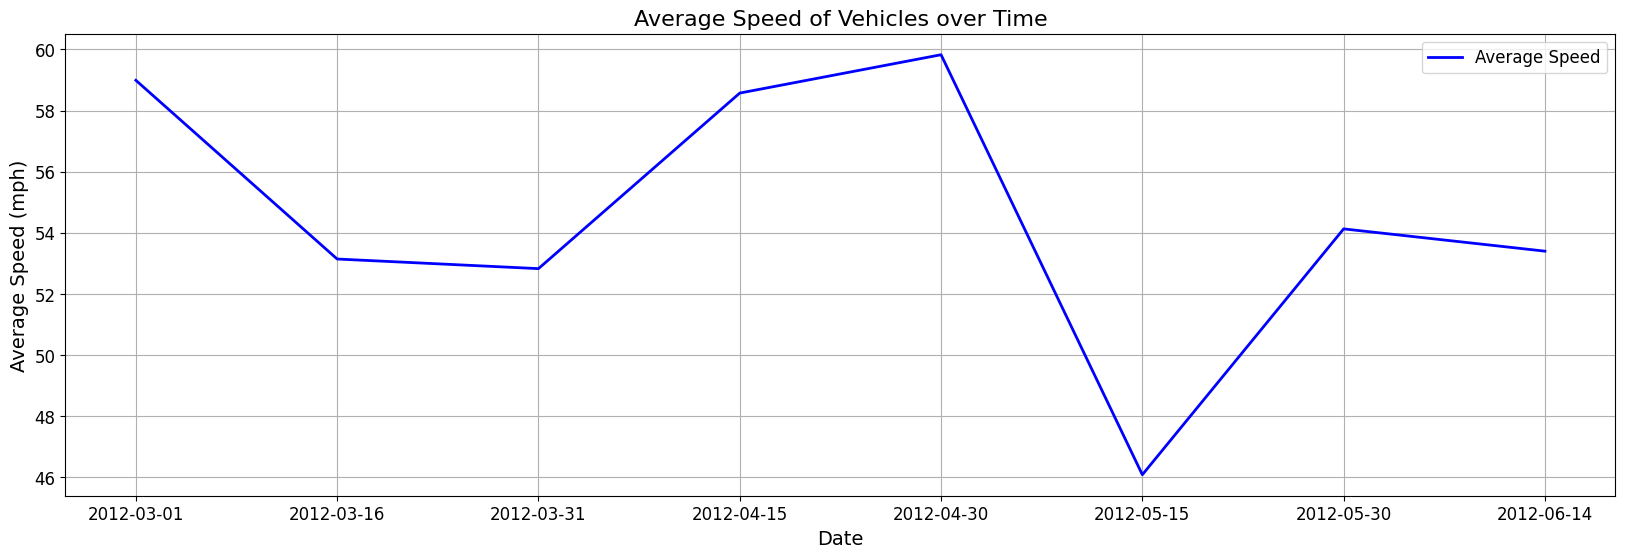

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date_list, quarterly_speed, color='blue', linewidth=2, label='Average Speed')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Speed (mph)', fontsize=14)
ax.set_title('Average Speed of Vehicles over Time', fontsize=16)
ax.legend(fontsize=12)
ax.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations or callouts as necessary
"""
plt.annotate('Construction Work', xy=(date[10], speed[10]), xytext=(date[5], 15),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)
plt.show()
"""

In [ ]:
graph_weights_df = pd.read_csv('/content/gdrive/My Drive/DATASET_GWAR/distances_la_2012.csv')
graph_weights_df

,from,to,cost
0,1201054,1201054,0.0
1,1201054,1201066,2610.9
2,1201054,1201076,2822.7
3,1201054,1201087,2911.5
4,1201054,1201100,7160.1
...,...,...,...
295369,825515,823663,9894.1
295370,825515,825494,475.6
295371,825515,825496,6458.6
295372,825515,825513,6934.2


In [ ]:
# Checking for Missing Values
graph_weights_df.isnull().sum()

from    0
to      0
cost    0
dtype: int64

In [ ]:
graph_locations_df = pd.read_csv('/content/gdrive/My Drive/DATASET_GWAR/graph_sensor_locations.csv')
graph_locations_df

,index,sensor_id,latitude,longitude
0,0,773869,34.15497,-118.31829
1,1,767541,34.11621,-118.23799
2,2,767542,34.11641,-118.23819
3,3,717447,34.07248,-118.26772
4,4,717446,34.07142,-118.26572
...,...,...,...,...
202,202,717592,34.14604,-118.22430
203,203,717595,34.14163,-118.18290
204,204,772168,34.16542,-118.47985
205,205,718141,34.15133,-118.37456


In [ ]:
# Check for Missing Values
graph_locations_df.isnull().sum()

index        0
sensor_id    0
latitude     0
longitude    0
dtype: int64

In [ ]:
unique_sensor_ids = np.unique(np.concatenate([graph_weights_df['from'], graph_weights_df['to']]))
unique_sensor_ids = np.delete(unique_sensor_ids, np.where(unique_sensor_ids == 715898))
unique_sensor_ids

array([ 715915,  715916,  715918, ..., 1219560, 1219581, 1219710])

**Sensor ID 715898 is present in Weights Matrix, but not present in the locations dataset**

**Following are the pairwise distances between sensors (Data Pre-Processing - Deriving New Features)**

In [ ]:
# create a dictionary to map each sensor id to its latitude and longitude coordinates
sensor_coords = {}
for index, row in graph_locations_df.iterrows():
    sensor_coords[int(row['sensor_id'])] = (row['latitude'], row['longitude'])

# create a list of tuples containing the pairwise distances between each sensor
distances = []
for i, id1 in enumerate(sensor_ids):
    for j, id2 in enumerate(sensor_ids):
        if i < j:
            coords1 = sensor_coords[id1]
            coords2 = sensor_coords[id2]
            distance = np.linalg.norm(np.array(coords1) - np.array(coords2))
            distances.append((id1, id2, distance))
# create a dataframe from the list of distances
sensor_distances_df = pd.DataFrame(distances, columns=['from', 'to', 'distance'])
# merge the distance data with the distances_la_2012 data to obtain a dataframe with the distances between each sensor pair
sensor_distances = pd.merge(sensor_distances_df, graph_weights_df, on=['from', 'to'])
sensor_distances.head()

,from,to,distance,cost
0,773869,765604,0.064596,8251.2
1,773869,767471,0.093620,10020.6
2,773869,773906,0.015715,3169.0
3,773869,769402,0.039885,8509.7
4,773869,769403,0.040162,7238.8


**Sensor Density in the Hollywood Region (Feature Engineering) - Data Transformation - Data Augmentation - Deriving new features**

In [ ]:
# Define the range of latitudes and longitudes (in degrees)
lat_min = 33.6
lat_max = 34.09
lon_min = -118.32
lon_max = -117.9
# Filter the sensor locations dataframe to keep only the rows within the desired range
sensor_locations_range_df = graph_locations_df[(graph_locations_df['latitude'] >= lat_min) & (graph_locations_df['latitude'] <= lat_max) & (graph_locations_df['longitude'] >= lon_min) & (graph_locations_df['longitude'] <= lon_max)]
sensor_locations_range_df
# Calculate the total number of sensors within the range
total_sensors = len(sensor_locations_range_df)
total_sensors
# Calculate the area of the range (in square kilometers) using the Haversine formula
R = 6371  # radius of the earth (in km)
lat1, lon1, lat2, lon2 = map(radians, [lat_min, lon_min, lat_max, lon_max])
dlat = lat2 - lat1
dlon = lon2 - lon1
a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
c = 2 * asin(sqrt(a))
area = R ** 2 * c
# Calculate the sensor density feature (in sensors per square kilometer)
sensor_density = total_sensors / area
print('Sensor density in Hollywood Region', sensor_density, 'sensors/km²')

Sensor density in Hollywood Region 8.4486521045026e-05 sensors/km²


**Using Clustering Techniques to identify the sensors located geographically close as sensors located in proximity will similar traffic pattern helping identify similar segments of the road network and enable the development of segment-specific traffic flow prediction models (Data Pre-processing)**

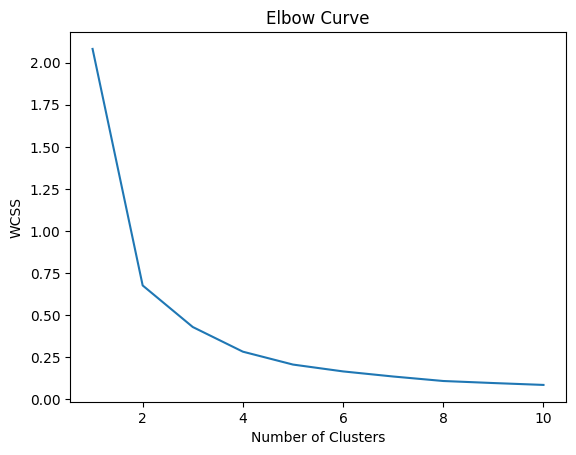

In [ ]:
# select the latitude and longitude columns
X = graph_locations_df[['latitude', 'longitude']]
# determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# perform k-means clustering with the chosen number of clusters using Elbow Method
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# add the cluster labels to the dataframe
graph_locations_df['cluster'] = y_kmeans

In [ ]:
graph_locations_df.head()

,index,sensor_id,latitude,longitude,cluster
0,0,773869,34.15497,-118.31829,2
1,1,767541,34.11621,-118.23799,0
2,2,767542,34.11641,-118.23819,0
3,3,717447,34.07248,-118.26772,0
4,4,717446,34.07142,-118.26572,0


In [ ]:
graph_locations_df.tail()

,index,sensor_id,latitude,longitude,cluster
202,202,717592,34.14604,-118.22430,0
203,203,717595,34.14163,-118.18290,0
204,204,772168,34.16542,-118.47985,1
205,205,718141,34.15133,-118.37456,2
206,206,769373,34.10262,-118.31740,2


**Data Preparation**

In [ ]:
def generate_graph_seq2seq_io_data(
        df, x_offsets, y_offsets, add_time_in_day=True, add_day_in_week=False, scaler=None
):
    """
    Generate samples from
    :param df:
    :param x_offsets:
    :param y_offsets:
    :param add_time_in_day:
    :param add_day_in_week:
    :param scaler:
    :return:
    # x: (epoch_size, input_length, num_nodes, input_dim)
    # y: (epoch_size, output_length, num_nodes, output_dim)
    """

    num_samples, num_nodes = df.shape
    data = np.expand_dims(df.values, axis=-1)
    data_list = [data]
    if add_time_in_day:
        time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
        time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
        data_list.append(time_in_day)
    if add_day_in_week:
        day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
        day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
        data_list.append(day_in_week)

    data = np.concatenate(data_list, axis=-1)
    # epoch_len = num_samples + min(x_offsets) - max(y_offsets)
    x, y = [], []
    # t is the index of the last observation.
    min_t = abs(min(x_offsets))
    max_t = abs(num_samples - abs(max(y_offsets)))  # Exclusive
    for t in range(min_t, max_t):
        x_t = data[t + x_offsets, ...]
        y_t = data[t + y_offsets, ...]
        x.append(x_t)
        y.append(y_t)
    x = np.stack(x, axis=0)
    y = np.stack(y, axis=0)
    return x, y

adj_mat_hdf = pd.read_hdf('/content/gdrive/My Drive/DATASET_GWAR/metr-la.h5')
x_offsets = np.sort(
        # np.concatenate(([-week_size + 1, -day_size + 1], np.arange(-11, 1, 1)))
        np.concatenate((np.arange(-11, 1, 1),))
    )
# np.arange(start,stop,step)
# x_offsets contains a list of integers which represent the number of time steps before the current time step for which we will use data as input to the model.
# Predict the next one hour
y_offsets = np.sort(np.arange(1, 13, 1))
x, y = generate_graph_seq2seq_io_data(
        adj_mat_hdf,
        x_offsets=x_offsets,
        y_offsets=y_offsets,
        add_time_in_day=True,
        add_day_in_week=False,
)
x, y = generate_graph_seq2seq_io_data(
        adj_mat_hdf,
        x_offsets=x_offsets,
        y_offsets=y_offsets,
        add_time_in_day=True,
        add_day_in_week=False,
    )
print("x shape: ", x.shape, ", y shape: ", y.shape)
# Write the data into npz file.
# num_test = 6831, using the last 6831 examples as testing.
# for the rest: 7/8 is used for training, and 1/8 is used for validation.
num_samples = x.shape[0]
num_test = round(num_samples * 0.2)
num_train = round(num_samples * 0.7)
num_val = num_samples - num_test - num_train

x shape:  (34249, 12, 207, 2) , y shape:  (34249, 12, 207, 2)


In [ ]:
print(num_samples)
print('Percent of Testing Data: ',(num_test/32472)*100)
print('Percent of Training Data: ',(num_train/32471)*100)
print('Percent of Validation Data: ',(num_val/32472)*100)

34249
Percent of Testing Data:  21.09509731460951
Percent of Training Data:  73.83203473868991
Percent of Validation Data:  10.547548657304755


**Data Analytics Results**

**Network graph, where each sensor is a node in the graph, and the edges between the nodes represent the distance between two sensors.**

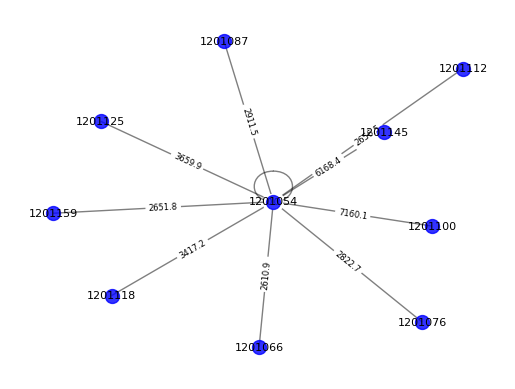

In [ ]:
# Create an empty Graph
graph_obj = nx.Graph()
# Add nodes for each sensor
sensors = list(set(list(graph_weights_df['from'][:10]) + list(graph_weights_df['to'][:10])))
for sensor in sensors:
    graph_obj.add_node(sensor)
# Add edges between sensors with distance as the weight
for i, row in graph_weights_df[:10].iterrows():
    graph_obj.add_edge(row['from'], row['to'], weight=row['cost'])
# Draw the network graph with edge weights as labels
pos = nx.spring_layout(graph_obj)
nx.draw_networkx_nodes(graph_obj, pos, node_size=100, node_color='blue', alpha=0.8)
nx.draw_networkx_edges(graph_obj, pos, width=1, alpha=0.5)
edge_labels = nx.get_edge_attributes(graph_obj, 'weight')
nx.draw_networkx_edge_labels(graph_obj, pos, edge_labels=edge_labels, font_size=6)
nx.draw_networkx_labels(graph_obj, pos, font_size=8, font_family='sans-serif')
plt.axis('off')
plt.show()

In [ ]:
# Create a map centered on Los Angeles
m = folium.Map(location=[34.0522, -118.2437], zoom_start=11)
# Add markers for each sensor
for i, row in graph_locations_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='gray',
        fill=True,
        fill_opacity=0.7,
        tooltip=row['sensor_id']
    ).add_to(m)
m

In [ ]:
import bokeh
from bokeh.io import output_file, save
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20c

# Create pivot table
pivot_table = graph_weights_df.pivot_table(values = 'cost', index='from', columns='to')
pivot_table = pivot_table.fillna(0)
# Convert pivot table to matrix
matrix = pivot_table.to_numpy()
# Get sensor IDs
sensor_ids = pivot_table.index.tolist()
sensor_ids = [str(item) for item in sensor_ids]
# Create chord diagram plot
plot = figure(plot_width=600, plot_height=600, x_range=FactorRange(factors=sensor_ids), y_range=FactorRange(factors=sensor_ids),
              tools='hover,save,reset', tooltips=[('Source', '@y'), ('Target', '@x'), ('Value', '@value')])

# Create data source
source = ColumnDataSource(data=dict(x=[], y=[], value=[]))
# Add rect renderer
plot.rect(x='x', y='y', width=1, height=1, source=source,
          line_color='white', fill_color=factor_cmap('value', palette=Category20c[20], factors=[str(i) for i in range(20)]))

# Update data source with matrix data
data = dict(
    x=[i for i in sensor_ids for j in sensor_ids],
    y=[j for i in sensor_ids for j in sensor_ids],
    value=matrix.flatten()
)
source.data = data
# Specify filename and path for saving the plot
output_file("barplot_connections.html")

# Save plot
save(plot)

'/content/barplot_connections.html'

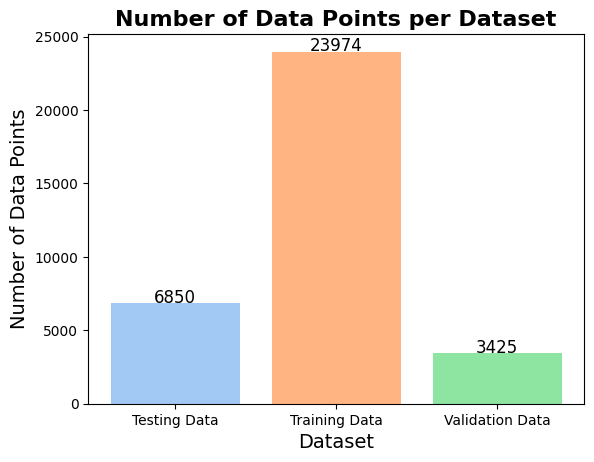

In [ ]:
# Data
num_samples = [num_test, num_train, num_val]
labels = ['Testing Data', 'Training Data', 'Validation Data']

# Color palette
colors = sns.color_palette("pastel")

# Plot
fig, ax = plt.subplots()
ax.bar(labels, num_samples, color=colors)
ax.set_title('Number of Data Points per Dataset', fontsize=16, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Number of Data Points', fontsize=14)

# Add values on top of each bar
for i, v in enumerate(num_samples):
    ax.text(i, v + 50, str(v), ha='center', fontsize=12)

plt.show()

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import RNN


class DCGRUCell(RNN):
    """Graph Convolution Gated Recurrent Unit cell.
    """

    def call(self, inputs, **kwargs):
        pass

    def compute_output_shape(self, input_shape):
        pass

    def __init__(self, num_units, adj_mx, max_diffusion_step, num_nodes, num_proj=None,
                 activation=tf.nn.tanh, reuse=None, filter_type="laplacian", use_gc_for_ru=True):
        """

        :param num_units:
        :param adj_mx:
        :param max_diffusion_step:
        :param num_nodes:
        :param input_size:
        :param num_proj:
        :param activation:
        :param reuse:
        :param filter_type: "laplacian", "random_walk", "dual_random_walk".
        :param use_gc_for_ru: whether to use Graph convolution to calculate the reset and update gates.
        """
        super(DCGRUCell, self).__init__(_reuse=reuse)
        self._activation = activation
        self._num_nodes = num_nodes
        self._num_proj = num_proj
        self._num_units = num_units
        self._max_diffusion_step = max_diffusion_step
        self._supports = []
        self._use_gc_for_ru = use_gc_for_ru
        supports = []
        if filter_type == "laplacian":
            supports.append(utils.calculate_scaled_laplacian(adj_mx, lambda_max=None))
        elif filter_type == "random_walk":
            supports.append(utils.calculate_random_walk_matrix(adj_mx).T)
        elif filter_type == "dual_random_walk":
            supports.append(utils.calculate_random_walk_matrix(adj_mx).T)
            supports.append(utils.calculate_random_walk_matrix(adj_mx.T).T)
        else:
            supports.append(utils.calculate_scaled_laplacian(adj_mx))
        for support in supports:
            self._supports.append(self._build_sparse_matrix(support))

    @staticmethod
    def _build_sparse_matrix(L):
        L = L.tocoo()
        indices = np.column_stack((L.row, L.col))
        L = tf.SparseTensor(indices, L.data, L.shape)
        return tf.sparse_reorder(L)

    @property
    def state_size(self):
        return self._num_nodes * self._num_units

    @property
    def output_size(self):
        output_size = self._num_nodes * self._num_units
        if self._num_proj is not None:
            output_size = self._num_nodes * self._num_proj
        return output_size

    def __call__(self, inputs, state, scope=None):
        """Gated recurrent unit (GRU) with Graph Convolution.
        :param inputs: (B, num_nodes * input_dim)

        :return
        - Output: A `2-D` tensor with shape `[batch_size x self.output_size]`.
        - New state: Either a single `2-D` tensor, or a tuple of tensors matching
            the arity and shapes of `state`
        """
        with tf.variable_scope(scope or "dcgru_cell"):
            with tf.variable_scope("gates"):  # Reset gate and update gate.
                output_size = 2 * self._num_units
                # We start with bias of 1.0 to not reset and not update.
                if self._use_gc_for_ru:
                    fn = self._gconv
                else:
                    fn = self._fc
                value = tf.nn.sigmoid(fn(inputs, state, output_size, bias_start=1.0))
                value = tf.reshape(value, (-1, self._num_nodes, output_size))
                r, u = tf.split(value=value, num_or_size_splits=2, axis=-1)
                r = tf.reshape(r, (-1, self._num_nodes * self._num_units))
                u = tf.reshape(u, (-1, self._num_nodes * self._num_units))
            with tf.variable_scope("candidate"):
                c = self._gconv(inputs, r * state, self._num_units)
                if self._activation is not None:
                    c = self._activation(c)
            output = new_state = u * state + (1 - u) * c
            if self._num_proj is not None:
                with tf.variable_scope("projection"):
                    w = tf.get_variable('w', shape=(self._num_units, self._num_proj))
                    batch_size = inputs.get_shape()[0].value
                    output = tf.reshape(new_state, shape=(-1, self._num_units))
                    output = tf.reshape(tf.matmul(output, w), shape=(batch_size, self.output_size))
        return output, new_state

    @staticmethod
    def _concat(x, x_):
        x_ = tf.expand_dims(x_, 0)
        return tf.concat([x, x_], axis=0)

    def _fc(self, inputs, state, output_size, bias_start=0.0):
        dtype = inputs.dtype
        batch_size = inputs.get_shape()[0].value
        inputs = tf.reshape(inputs, (batch_size * self._num_nodes, -1))
        state = tf.reshape(state, (batch_size * self._num_nodes, -1))
        inputs_and_state = tf.concat([inputs, state], axis=-1)
        input_size = inputs_and_state.get_shape()[-1].value
        weights = tf.get_variable(
            'weights', [input_size, output_size], dtype=dtype,
            initializer=tf.contrib.layers.xavier_initializer())
        value = tf.nn.sigmoid(tf.matmul(inputs_and_state, weights))
        biases = tf.get_variable("biases", [output_size], dtype=dtype,
                                 initializer=tf.constant_initializer(bias_start, dtype=dtype))
        value = tf.nn.bias_add(value, biases)
        return value

    def _gconv(self, inputs, state, output_size, bias_start=0.0):
        """Graph convolution between input and the graph matrix.

        :param args: a 2D Tensor or a list of 2D, batch x n, Tensors.
        :param output_size:
        :param bias:
        :param bias_start:
        :param scope:
        :return:
        """
        # Reshape input and state to (batch_size, num_nodes, input_dim/state_dim)
        batch_size = inputs.get_shape()[0].value
        inputs = tf.reshape(inputs, (batch_size, self._num_nodes, -1))
        state = tf.reshape(state, (batch_size, self._num_nodes, -1))
        inputs_and_state = tf.concat([inputs, state], axis=2)
        input_size = inputs_and_state.get_shape()[2].value
        dtype = inputs.dtype

        x = inputs_and_state
        x0 = tf.transpose(x, perm=[1, 2, 0])  # (num_nodes, total_arg_size, batch_size)
        x0 = tf.reshape(x0, shape=[self._num_nodes, input_size * batch_size])
        x = tf.expand_dims(x0, axis=0)

        scope = tf.get_variable_scope()
        with tf.variable_scope(scope):
            if self._max_diffusion_step == 0:
                pass
            else:
                for support in self._supports:
                    x1 = tf.sparse_tensor_dense_matmul(support, x0)
                    x = self._concat(x, x1)

                    for k in range(2, self._max_diffusion_step + 1):
                        x2 = 2 * tf.sparse_tensor_dense_matmul(support, x1) - x0
                        x = self._concat(x, x2)
                        x1, x0 = x2, x1

            num_matrices = len(self._supports) * self._max_diffusion_step + 1  # Adds for x itself.
            x = tf.reshape(x, shape=[num_matrices, self._num_nodes, input_size, batch_size])
            x = tf.transpose(x, perm=[3, 1, 2, 0])  # (batch_size, num_nodes, input_size, order)
            x = tf.reshape(x, shape=[batch_size * self._num_nodes, input_size * num_matrices])

            weights = tf.get_variable(
                'weights', [input_size * num_matrices, output_size], dtype=dtype,
                initializer=tf.contrib.layers.xavier_initializer())
            x = tf.matmul(x, weights)  # (batch_size * self._num_nodes, output_size)

            biases = tf.get_variable("biases", [output_size], dtype=dtype,
                                     initializer=tf.constant_initializer(bias_start, dtype=dtype))
            x = tf.nn.bias_add(x, biases)
        # Reshape res back to 2D: (batch_size, num_node, state_dim) -> (batch_size, num_node * state_dim)
        return tf.reshape(x, [batch_size, self._num_nodes * output_size])